In [2]:
import pandas as pd

df = pd.read_csv('Data_Merge_and_Imputation.csv')
df.head(), df.shape

(        지점  풍속(m/s)  풍향(deg)  GUST풍속(m/s)  현지기압(hPa)  습도(%)  기온(°C)  수온(°C)  \
 0  21229.0      2.1    304.0          4.2     1031.0   45.0     6.2    11.9   
 1  21229.0      4.5    293.0          6.9     1030.6   51.0     6.2    11.7   
 2  21229.0      4.6    277.0          7.2     1030.4   42.0     6.5    12.4   
 3  21229.0      3.2    285.0          6.0     1030.4   40.0     6.5    13.2   
 4  21229.0      2.7    276.0          4.6     1030.5   41.0     6.7    13.3   
 
    최대파고(m)  유의파고(m)  평균파고(m)  파주기(sec)  파향(deg)  풍속1(m/s)  풍향1(deg)  \
 0      3.7      2.2      1.1       6.4    103.0      4.04     273.0   
 1      3.6      2.2      1.1       4.3     82.0      5.58     225.6   
 2      3.4      2.1      1.0       4.9    206.0      4.16     280.6   
 3      3.3      2.1      1.0       4.6      8.0      5.62     308.8   
 4      2.6      1.9      1.0       9.1     37.0      3.94     282.4   
 
    GUST풍속 1(m/s)  
 0           6.62  
 1           8.38  
 2           6.80  
 3  

In [3]:
# 조건 기반 출항 여부 데이터 생성
import numpy as np

# 풍속이 14m/s 이상이거나 유의 파고가 3m 이상일 때 출항 불가 (0), 그 외는 출항 가능 (1)
df['출항여부'] = np.where((df['풍속(m/s)'] >= 14) | (df['유의파고(m)'] >= 3), 0, 1).astype(float)
df.head()

,지점,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg),풍속1(m/s),풍향1(deg),GUST풍속 1(m/s),출항여부
0,21229.0,2.1,304.0,4.2,1031.0,45.0,6.2,11.9,3.7,2.2,1.1,6.4,103.0,4.04,273.0,6.62,1.0
1,21229.0,4.5,293.0,6.9,1030.6,51.0,6.2,11.7,3.6,2.2,1.1,4.3,82.0,5.58,225.6,8.38,1.0
2,21229.0,4.6,277.0,7.2,1030.4,42.0,6.5,12.4,3.4,2.1,1.0,4.9,206.0,4.16,280.6,6.80,1.0
3,21229.0,3.2,285.0,6.0,1030.4,40.0,6.5,13.2,3.3,2.1,1.0,4.6,8.0,5.62,308.8,8.46,1.0
4,21229.0,2.7,276.0,4.6,1030.5,41.0,6.7,13.3,2.6,1.9,1.0,9.1,37.0,3.94,282.4,6.60,1.0


In [4]:
df['GUST풍속(m/s)'].max()

164.1

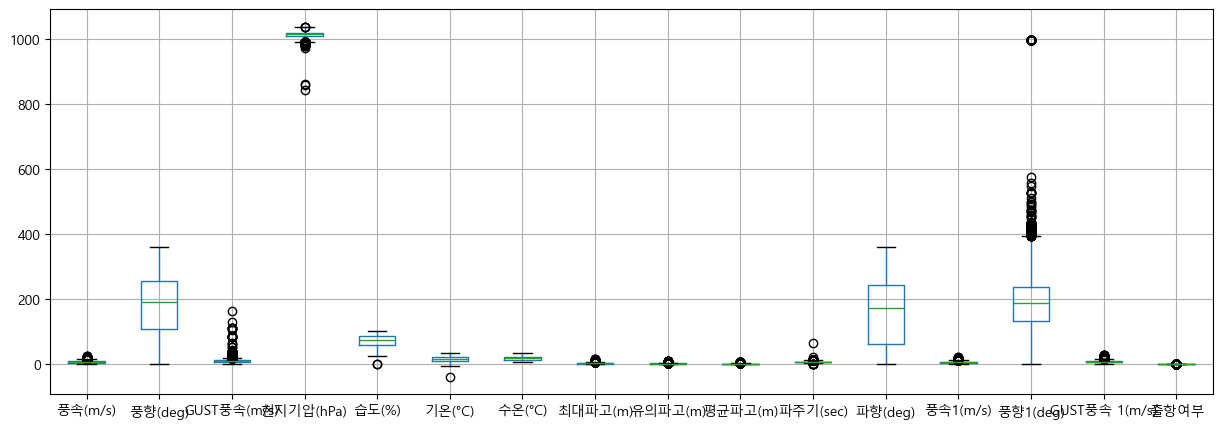

In [5]:
# 이상치 확인
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

df.drop('지점', axis=1).boxplot(figsize=(15,5))
plt.show()

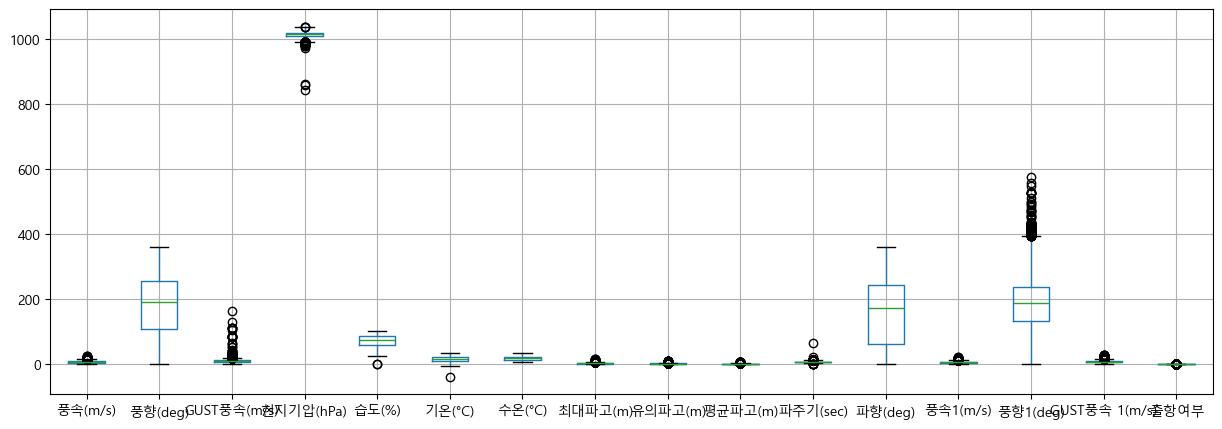

In [6]:
# 이상치 제거
df = df[df['풍향1(deg)'] <= 800]

# 이상치 재확인
df.drop('지점', axis=1).boxplot(figsize=(15,5))
plt.show()

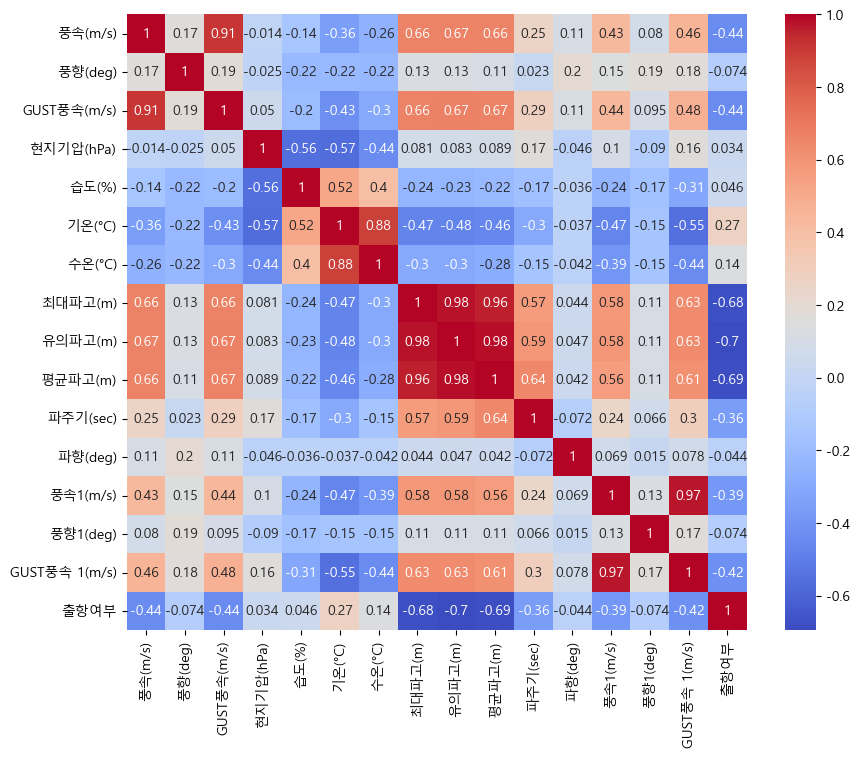

In [7]:
# 상관관계
import seaborn as sns

df.drop(columns=['지점'], inplace=True)
corr_mat = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_mat, annot = True, cmap = 'coolwarm')
plt.show()

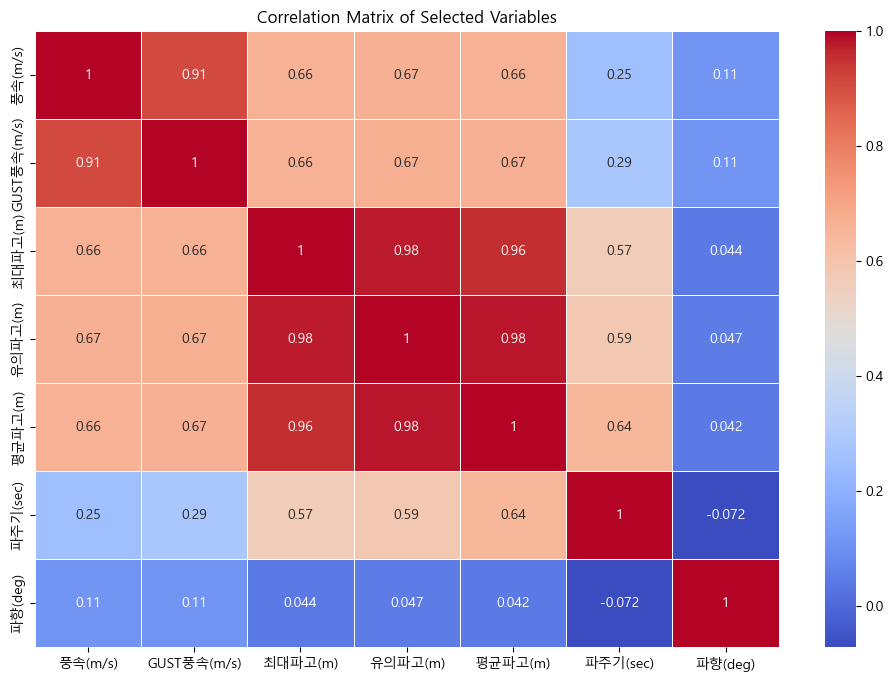

In [8]:
selected_columns = ['풍속(m/s)', 'GUST풍속(m/s)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)', '파향(deg)']

# 선택된 변수 간의 상관관계 행렬 계산
correlation_matrix = df[selected_columns].corr()

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Selected Variables')
plt.show()

In [9]:
# 왜도 확인
import numpy as np
df.skew()

풍속(m/s)          0.625133
풍향(deg)         -0.100148
GUST풍속(m/s)      2.747577
현지기압(hPa)       -0.390297
습도(%)           -0.220784
기온(°C)          -0.119567
수온(°C)           0.231371
최대파고(m)          1.485296
유의파고(m)          1.481082
평균파고(m)          1.527621
파주기(sec)         0.656281
파향(deg)          0.170057
풍속1(m/s)         0.711715
풍향1(deg)        -0.029354
GUST풍속 1(m/s)    0.767814
출항여부            -3.313980
dtype: float64

In [10]:
# 왜도 조절 후 확인
df.loc[:, 'GUST풍속(m/s)'] = np.log1p(df['GUST풍속(m/s)'])
df.loc[:, '평균파고(m)'] = np.log1p(df['평균파고(m)'])
df.skew()

풍속(m/s)          0.625133
풍향(deg)         -0.100148
GUST풍속(m/s)     -0.441422
현지기압(hPa)       -0.390297
습도(%)           -0.220784
기온(°C)          -0.119567
수온(°C)           0.231371
최대파고(m)          1.485296
유의파고(m)          1.481082
평균파고(m)          0.664738
파주기(sec)         0.656281
파향(deg)          0.170057
풍속1(m/s)         0.711715
풍향1(deg)        -0.029354
GUST풍속 1(m/s)    0.767814
출항여부            -3.313980
dtype: float64

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop(columns=['출항여부'])
y = df['출항여부']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 오버샘플링 적용 : 소수 클래스(출항 불가)의 데이터 개수를 늘려 다수 클래스(출항 가능)와의 비율을 맞추는 기법
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before Over-sampling:", len(y_train), "After Over-sampling:", len(y_train_res))

Before Over-sampling: 83183 After Over-sampling: 154400


In [12]:
model_data = pd.concat([X_train_res, pd.DataFrame(y_train_res, columns=['출항여부'])], axis=1)

model_data.shape, model_data.isnull().sum()

model_data.to_csv('Preprocessed_Modeling.csv', index=False)
